In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("us-states.csv")

In [45]:
data.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [46]:
# first transfer the data type from strings to datetime 
data['date'] = pd.to_datetime(data['date'])

In [47]:
def plot(lst):
    plt.figure(figsize=(10, 5))
    for state in lst:
        data1 = data[data['state']==state]
        data1['cases'] = data1['cases'].diff()
        plt.plot(data1['date'], data1['cases'], label=state)
    plt.legend()
    plt.title('daily cases')
    plt.xlabel('date')
    plt.ylabel('cases')
    plt.show()

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/6175440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()
/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/6175440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()


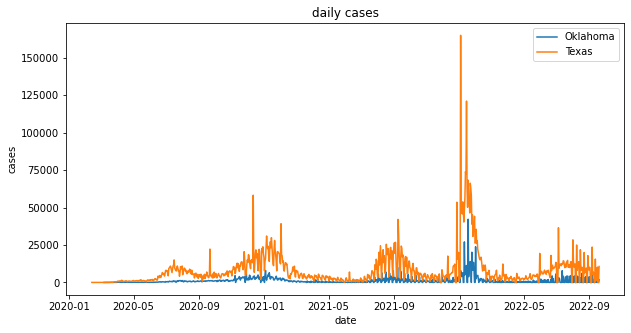

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/6175440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()
/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/6175440.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()


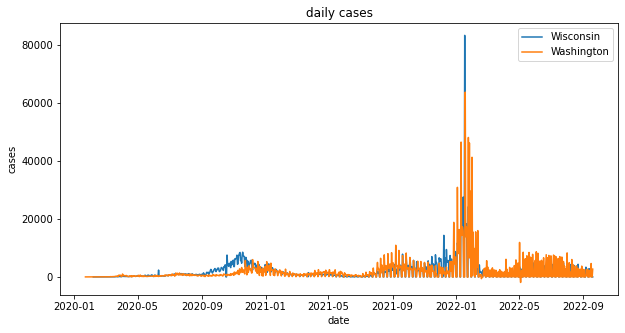

In [48]:
# Example to test plot function
lst = ['Oklahoma', 'Texas']
plot(lst)
lst2 = ['Wisconsin','Washington']
plot(lst2)

In [49]:
def highest_date(state):    
    data1 = data[data['state']==state]
    data1['cases'] = data1['cases'].diff()
    date = data1[data1['cases'] == np.max(data1['cases'])]['date']
    return date

highest_date('Alabama')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/4266800029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()


38478   2022-01-29
Name: date, dtype: datetime64[ns]

In [50]:
highest_date('Illinois')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/4266800029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()


37877   2022-01-18
Name: date, dtype: datetime64[ns]

In [51]:
highest_date('Virginia')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/4266800029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()


37465   2022-01-10
Name: date, dtype: datetime64[ns]

In [52]:
def peak_diff(state1, state2):
    data1 = data[data['state']==state1]
    data2 = data[data['state']==state2]
    
    data1['cases'] = data1['cases'].diff()
    data2['cases'] = data2['cases'].diff()
    
    date1 = np.min(data1[data1['cases'] == np.max(data1['cases'])]['date'])
    date2 = np.min(data2[data2['cases'] == np.max(data2['cases'])]['date'])
    
    if date1 > date2:
        return state1, (date1 - date2).days
    # when two states reach their new cases peak at the same date
    elif date1 == date2:
        return "These two states reaches the peak at the same date",date1, 0
    else:
        return state2, (date2 - date1).days

peak_diff('Texas', 'Oklahoma')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()
/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cases'] = data2['cases'].diff()


('Oklahoma', 14)

In [53]:
peak_diff('Connecticut', 'California')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()
/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cases'] = data2['cases'].diff()


('These two states reaches the peak at the same date',
 Timestamp('2022-01-10 00:00:00'),
 0)

In [54]:
peak_diff('Alabama', 'Texas')

/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cases'] = data1['cases'].diff()
/var/folders/p2/_8x6wz3175b_hw3n4s5tp1fm0000gn/T/ipykernel_69714/1530477162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cases'] = data2['cases'].diff()


('Alabama', 26)